# Running the Agent-Based Model

This notebook will provide a basic outline of how an instance of the agent-based model described in the previous notebook can be run.

## Imports

In order to run the model, we need to import the `Model` class found in `~/src/model/stationsim_gcs.py`.
We can do this using `sys.path.append()` to add `~/src/model/` to the system path and importing `Model` from `stationsim_gcs`.

In [1]:
from IPython.display import HTML
from sys import path
from tqdm import tqdm

In [2]:
path.append('../src/model/')

In [3]:
from stationsim_gcs import Model

## Paths and Directories

*Nothing to add for this notebook*

## Functions

*Nothing to add for this notebook*

## Running StationSim

This section of the notebook will outline the simple procedure that we use to run our model.
When running the model, we typically want to set values for some of the model parameters of interest.
These paramters include:

Parameters of interest:
* `station`: what type of station are we looking to simulate?
* `pop_total`: how many pedestrians would we like in our model?
* `do_print`: would we like the model to print any outputs as it runs?
* `speed_mean`: what should be the mean value of the speeds of the pedestrians?
* `speed_std`: what should be the standard deviation of the speeds of the pedetrians?
* `speed_min`: what should be the minimum speed of pedestrians?
* `step_limit`: how many timesteps would we like to limit our model to?

Each of these parameters has a default value built into the model, but we can also provide specific values when setting up an instance of the model.

The following few cells show how we would go about providing specific parameter values to our model.
We can first define a dictionary with the following parameter values:
* `pop_total`: $50$, i.e. we want $50$ pedestrians in our model.
* `station`: `Grand_Central`, i.e. we want to simulate Grand Central Station.
* `do_print`: `False`, i.e. we do not want our model to print outputs as it runs.

In [4]:
# Define dictionary of parameter values
model_params = {'pop_total': 50,
                'station': 'Grand_Central',
                'do_print': False}

We can then create an instance of the model based on the dictionary of parameter values that we have just created.

In [5]:
# Create an instance of the model
model = Model(**model_params)

And finally we can run the model by using a `for`-loop to iterate it forward step by step.

In [6]:
# Iterate model forward
for _ in range(model.step_limit):
    model.step()

Given that we have asked the model not to print outputs, it may not be clear how quickly the model is progressing.
To remedy this, we can use `tqdm` which produces a progress bar for us to show us what percentage of the iterations the loop has completed

In [7]:
# Create an instance of the model
model = Model(**model_params)

# Iterate model forward
for _ in tqdm(range(model.step_limit)):
    model.step()

100%|██████████████████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 609.50it/s]


Now that we have an idea of how to set up a model and run it, let's give it a try for ourselves.
If we wanted to run a model with the following parameters values, how would we do it?
* `speed_mean`: $2$
* `speed_std`: $2$
* `pop_total`: $30$
* `do_print`: `False`
* `station`: `Grand_Central`

In [8]:
# Define dictionary of parameter values
model_params = {"speed_mean": 2,
                "speed_std": 2,
                "pop_total": 30,
                "do_print": False,
                "station": "Grand_Central"}

# Create instance of the model
model = Model(**model_params)

# Iterate the model forward
for _ in tqdm(range(model.step_limit)):
    model.step()

100%|█████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2500.71it/s]


## Visualising StationSim

Now that we have managed to successfully run our agent-based model, we may wish to visualise what is going on in the model.
There are a couple of ways that we may wish to do this.

The first approach is to visualise the agent paths, i.e. plot lines representing the paths taken by each pedestrian agent in the model.
Fortunately the model already has a method attached to it called `get_trails()` to do this:

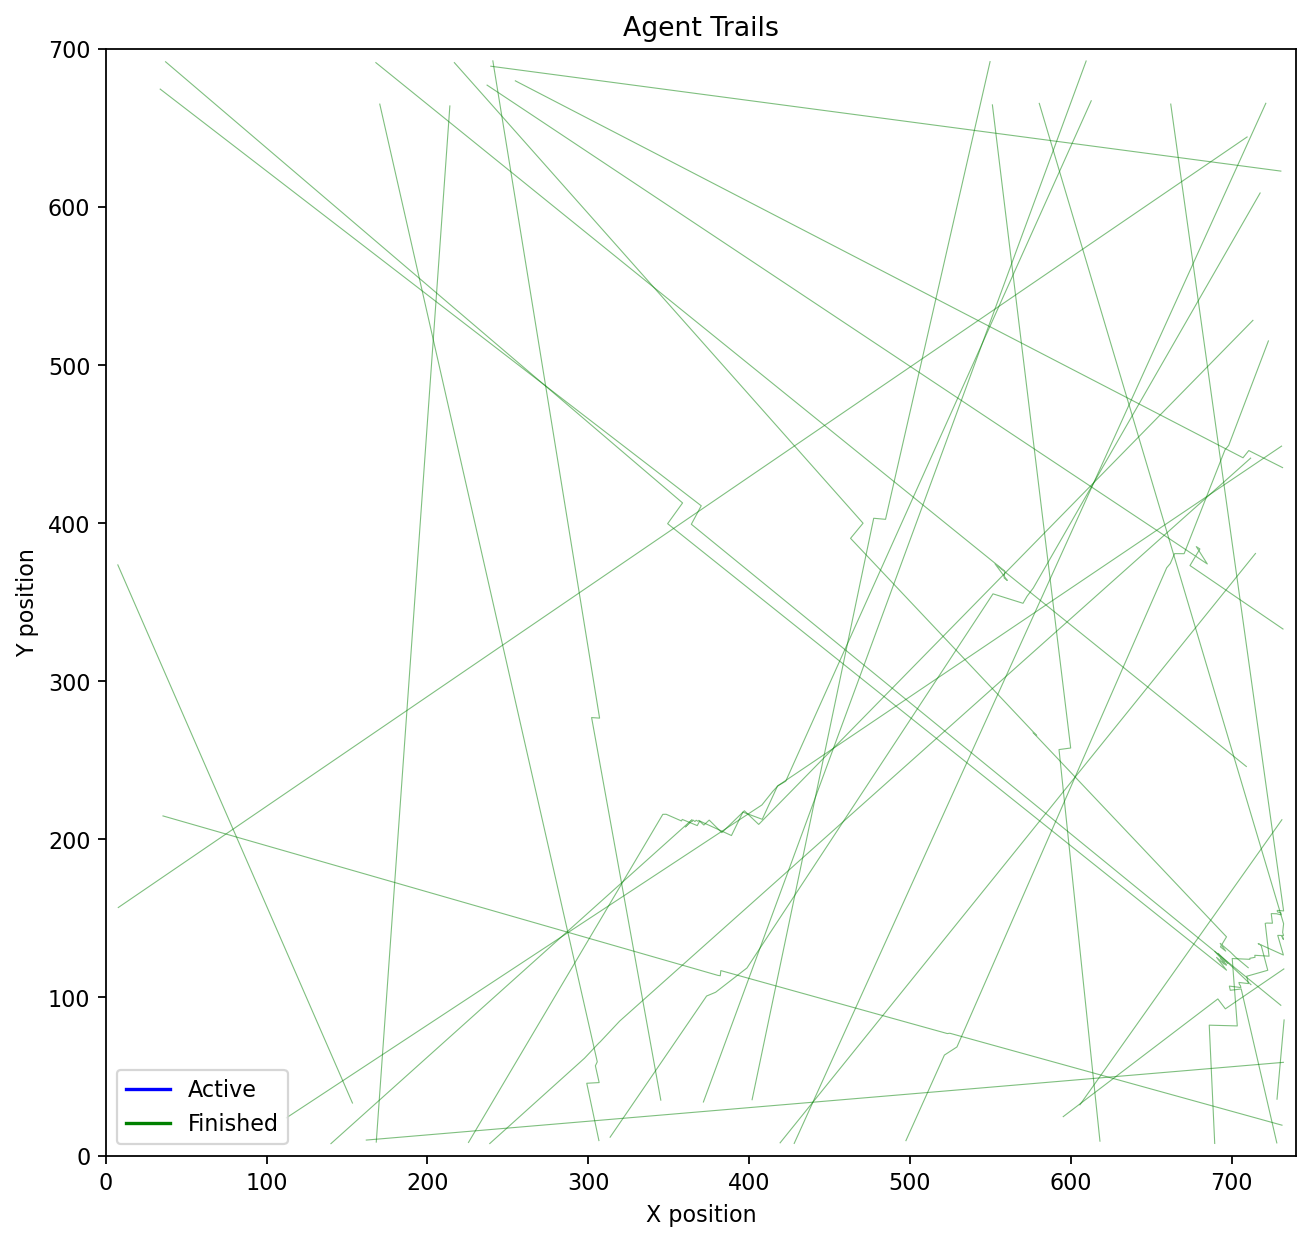

In [9]:
fig = model.get_trails(plot_axis=True, plot_legend=True)

There are a couple of points to note - you may recall that in the previous notebook, we noted that this model is a stochastic one; that is to say that there are a number of random elements in it.
Consequently, when running the model, each of us is likely to observe slightly different results (although qualitatively our observations should be largely similar).

Looking at the paths taken by the pedestrians above, we can see that many of the lines are completely straight, i.e. pedestrians have walked in a straight line from their starting-point to their end-point.
There are, however, some paths which deviate from a straight line - these are cases where pedestrian agents have had to alter their course to avoid obstacles (either the stationary clock in the centre of the model environment or other pedestrians). 

The second approach to visualising the paths of the pedestrian agents is to do so with an animation, i.e. plotting each pedestrian agent as a point which we can observe moving across the model environment over time.
Once again, we already have a method attached to the model to do this called `get_ani()`.

WARNING, ANIMATION MAY TAKE A MINUTE OR TWO TO PRODUCE.

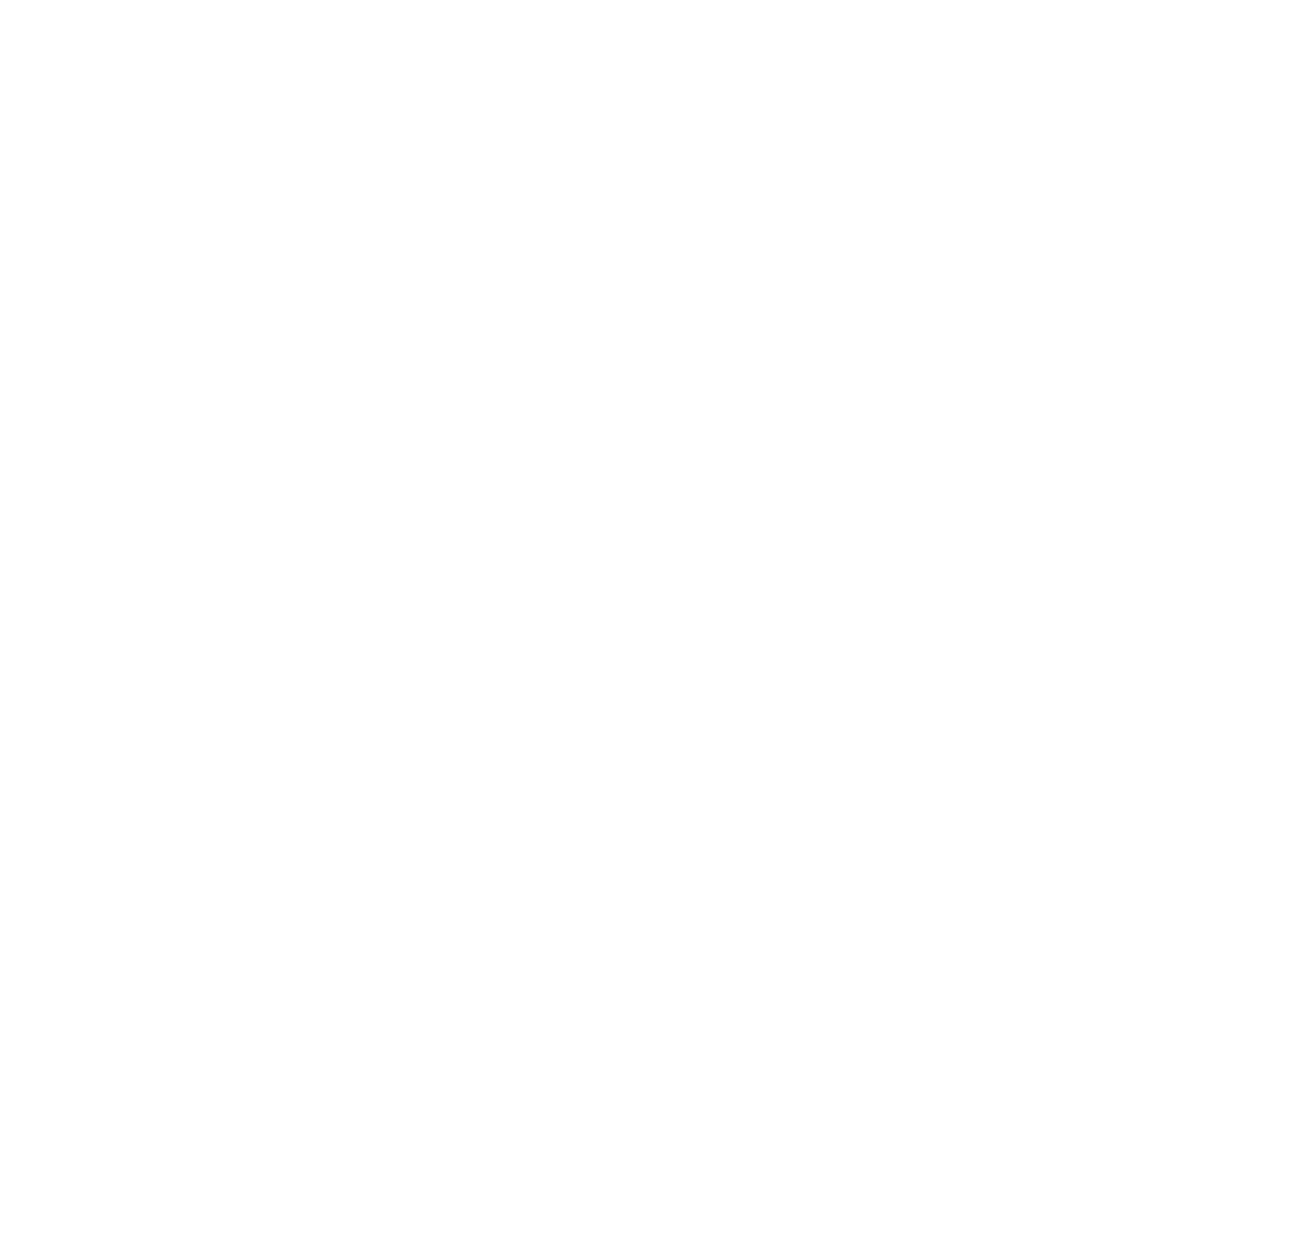

In [10]:
ani = model.get_ani(show_separation=True)
HTML(ani.to_html5_video())

Watching the animation, we see not only what paths each pedestrian agent takes, but also how the agents interact.
We see that, when their paths cross, the agents wiggle about in an attempt to avoid each other, and employ a similar behaviour when interacting with the central clock.

## Closing remarks

We have briefly seen how to run and visualise the StationSim model of pedestrian motion at Grand Central Station.
This makes use of Python code which can be found in `src/model/stationsim_gcs.py`; we have not really touched on the contents of this file as we do not need to know much about how the code works in order to run the model (you are welcome to take a look at the code if you wish though).

Now that we are able to run the model, we are going to make use of some real-world data in order to calibrate some of the paramters values that we are passing into the model.
In the [next notebook](./2_speed_calibration.ipynb), we will look to analyse real-world data to find reasonable values for the different speed parameters that are used by the model.